In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import scipy.stats as stats
from run_stats import *

In [2]:
# survey_data = pd.read_excel("./Experimental_Data_revised.xlsx", 'Surveys')

## RQ2: Visual Behavior

#### Variables

In [5]:
relevant_columns = ['neutral_fc',  'lemon_fc',   'fish_fc', 
                    'neutral_fd',  'lemon_fd',   'fish_fd', 
                    'neutral_avfd','lemon_avfd', 'fish_avfd']

### CODE COMPREHENSION

In [6]:
# found in 'tobii metrics' folder
cc_df = pd.read_excel("tobii_metrics/code_summary.xlsx")
calculate_stats(cc_df, relevant_columns)


# calculate_stats(cc_df)

Fixation Count
neutral_fc, num elements: 8, mean: 1895.75, std: 319.5644496811246, normal (above 0.5 is normal): 0.6674665808677673
lemon_fc, num elements: 8, mean: 2173.125, std: 261.21372355793255, normal (above 0.5 is normal): 0.9295347929000854
fish_fc, num elements: 10, mean: 2619.4, std: 937.7518008513767, normal (above 0.5 is normal): 0.4714890420436859
Neutral: [1843.0, 1990.0, 1972.0, 1941.0, 1596.0, 1261.0, 2341.0, 2222.0]
Lemon: [1941.0, 2612.0, 2168.0, 1979.0, 2380.0, 1764.0, 2398.0, 2143.0]
Fish: [1710.0, 1452.0, 3230.0, 1917.0, 2791.0, 4529.0, 1576.0, 3173.0, 3408.0, 2408.0]
ANOVA F: 2.7327005323846363, P VAL: 0.0861432160029115
Neutral v Fish | T-stat: -1.968423427705471, p-val: 0.06659545042629236, Effect Size: -0.9337052146777619
Neutral v Lemon | T-stat: -1.7780341897870295, p-val: 0.09711602461517607, Effect Size: -0.8890170948935148
Fish v Lemon | T-stat: 1.2314197084272067, p-val: 0.23595958106603285, Effect Size: 0.5841136551375623

Cumulative Fixation Duration
ne

### CODE WRITING

In [7]:
# found in writingFixations folder
w_df = pd.read_csv("writingFixations/all_itrace_counts.csv")
calculate_stats(w_df, relevant_columns)


Fixation Count
neutral_fc, num elements: 7, mean: 1474.7142857142858, std: 374.6113087629113, normal (above 0.5 is normal): 0.07855892926454544
lemon_fc, num elements: 8, mean: 1674.625, std: 253.69860932807654, normal (above 0.5 is normal): 0.7745681405067444
fish_fc, num elements: 10, mean: 1196.2, std: 311.4019267763127, normal (above 0.5 is normal): 0.778319776058197
Neutral: [1342.0, 1675.0, 2293.0, 1283.0, 1302.0, 1052.0, 1376.0]
Lemon: [1996.0, 1443.0, 1683.0, 1569.0, 1706.0, 1694.0, 1238.0, 2068.0]
Fish: [1742.0, 857.0, 1229.0, 1433.0, 1030.0, 833.0, 1218.0, 1320.0, 750.0, 1550.0]
ANOVA F: 4.633585323552959, P VAL: 0.02092546252380288
Neutral v Fish | T-stat: 1.566651961485428, p-val: 0.1380458023435423, Effect Size: 0.7720545156847444
Neutral v Lemon | T-stat: -1.1381788770619619, p-val: 0.27558756657723776, Effect Size: -0.5890635325735616
Fish v Lemon | T-stat: -3.311125228005602, p-val: 0.004414605912255209, Effect Size: -1.5706046007813068

Cumulative Fixation Duration
neu

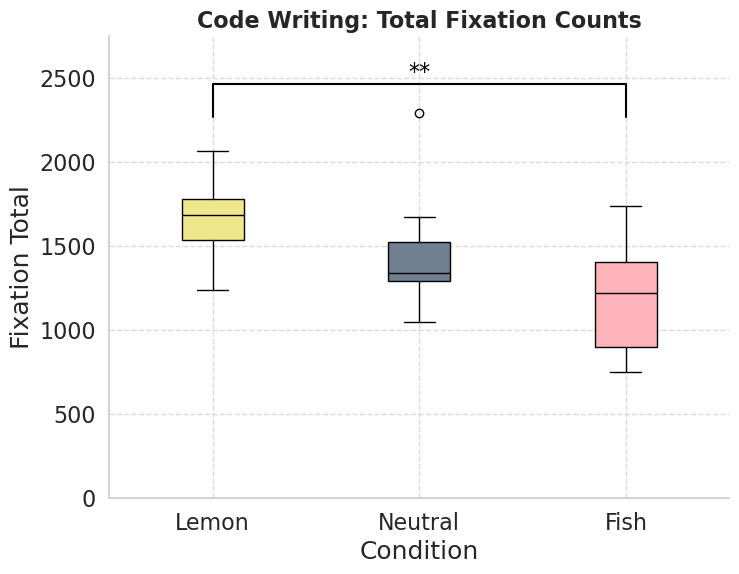

In [20]:
data = {
    'neutral': [1342.0, 1675.0, 2293.0, 1283.0, 1302.0, 1052.0, 1376.0],
    'lemon': [1996.0, 1443.0, 1683.0, 1569.0, 1706.0, 1694.0, 1238.0, 2068.0],
    'fish': [1742.0, 857.0, 1229.0, 1433.0, 1030.0, 833.0, 1218.0, 1320.0, 750.0, 1550.0]
}
# data = task_duration_data
# data = prose_saccades

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Code Writing: Total Fixation Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Fixation Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

# Adding the significance annotation
x1, x2 = 1, 3  # positions for Lemon and Fish
y, h, col = max(max(data['lemon']), max(data['fish'])) + 200, 200, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"**", ha='center', va='bottom', fontsize=16, color=col)

ax = plt.gca()
ax.set_ylim([0,2750])

# Remove top and right spines for a cleaner look
sns.despine()
plt.savefig("figures/fixations_box_plot.png", dpi=150)
# Show the plot
plt.show()

### Reading Comprehension

In [9]:
prose_df = pd.read_excel("tobii_metrics/prose_summary.xlsx")
calculate_stats(prose_df, relevant_columns)


Fixation Count
neutral_fc, num elements: 9, mean: 1633.7777777777778, std: 479.7792959679546, normal (above 0.5 is normal): 0.47381776571273804
lemon_fc, num elements: 10, mean: 1818.9, std: 314.12209409718383, normal (above 0.5 is normal): 0.6751418113708496
fish_fc, num elements: 7, mean: 1987.7142857142858, std: 114.52475002088822, normal (above 0.5 is normal): 0.7268082499504089
Neutral: [1637.0, 1875.0, 1098.0, 946.0, 1866.0, 1669.0, 2179.0, 2383.0, 1051.0]
Lemon: [1931.0, 1790.0, 2230.0, 1340.0, 1830.0, 2316.0, 1336.0, 1769.0, 1609.0, 2038.0]
Fish: [2056.0, 1819.0, 1937.0, 2214.0, 1981.0, 1918.0, 1989.0]
ANOVA F: 1.8212294746844397, P VAL: 0.18440198994525778
Neutral v Fish | T-stat: -1.7865727801861842, p-val: 0.09567221417864802, Effect Size: -0.9003480524742681
Neutral v Lemon | T-stat: -0.9499021595661167, p-val: 0.3554720041819388, Effect Size: -0.4364499225725046
Fish v Lemon | T-stat: 1.2775020115057891, p-val: 0.22084419172896752, Effect Size: 0.6295598646199778

Cumulati

### SACCADES

In [10]:
task_data = pd.read_excel("Experimental_Data_revised.xlsx", "Tasks")

In [11]:
fish_idx = np.where(task_data['CONDITION'] == 'bad')
lemon_idx = np.where(task_data['CONDITION'] == 'good')
neutral_idx = np.where(task_data['CONDITION'] == 'neutral')

fish_ppl = list(task_data.loc[fish_idx, 'ID'])
lemon_ppl = list(task_data.loc[lemon_idx, 'ID'])
neutral_ppl = list(task_data.loc[neutral_idx, 'ID'])

In [15]:
# datadir = "/storage1/smell-study/fixed_prolabs/"
# filenames = os.listdir(datadir)
# # print(datadir)

# ccd_saccades = {
#     'fish' : [],
#     'lemon' : [],
#     'neutral' : []
# }

# prose_saccades = {
#     'fish' : [],
#     'lemon' : [],
#     'neutral' : []
# }

# def calculate_saccades(df):
#     # print(df.columns)
#     # col = df['Eye movement type']
#     saccade_mask = df['Eye movement type'] == 'Saccade'
#     sequence_start = saccade_mask & ~saccade_mask.shift(1, fill_value=False)
#     return sequence_start.sum() 

# for f in filenames: 
#     print(f)
#     pid = int(re.split("_", f)[0]) # filenames formatted like 675_tobii.tsv, so this isolates just the pid
#     group = 'fish' if pid in fish_ppl else 'lemon' if pid in lemon_ppl else 'neutral' if pid in neutral_ppl else 'boogy-woogy'
    
#     pidf = pd.read_csv(f"{datadir}/{f}", sep='\t')
    
#     ccd_df = pidf.loc[np.where(pidf['Timeline name'] == 'Code')[0], :]
#     prose_df = pidf.loc[np.where(pidf['Timeline name'] == 'Prose')[0], :]
    
#     ccd_count = calculate_saccades(ccd_df)
#     prose_count = calculate_saccades(prose_df)
    
#     ccd_saccades[group].append(ccd_count)
#     prose_saccades[group].append(prose_count)

# # saving output
# # with open("saccades/ccd_saccades.pkl", 'wb') as f:
# #     pickle.dump(ccd_saccades, f)
    
# # with open("saccades/prose_saccades.pkl", 'wb') as f:
# #     pickle.dump(prose_saccades, f)

In [14]:
with open("midprocessing/ccd_saccades.pkl", 'rb') as f:
    ccd_saccades = pickle.load(f)
    
with open("midprocessing/prose_saccades.pkl", 'rb') as f:
    prose_saccades = pickle.load(f)
    
with open("midprocessing/writing_saccades.pkl", 'rb') as f:
    writing_saccades = pickle.load(f)

In [15]:
# for k, v in ccd_saccades.items():
#     ccd_saccades[k] = [int(el) for el in v]
# for k, v in prose_saccades.items():
#     prose_saccades[k] = [int(el) for el in v]
# for k, v in writing_saccades.items():
#     writing_saccades[k] = [int(el) for el in v]
    
three_lists_stats(fish_list=pd.Series(prose_saccades['fish']), 
                  lemon_list=pd.Series(prose_saccades['lemon']), 
                  neut_list=pd.Series(prose_saccades['neutral']), name='PROSE SACCADES')

three_lists_stats(fish_list=pd.Series(ccd_saccades['fish']), 
                  lemon_list=pd.Series(ccd_saccades['lemon']), 
                  neut_list=pd.Series(ccd_saccades['neutral']), name='CODE SACCADES')

three_lists_stats(fish_list=pd.Series(writing_saccades['fish']), 
                  lemon_list=pd.Series(writing_saccades['lemon']), 
                  neut_list=pd.Series(writing_saccades['neutral']), name='WRITING SACCADES')

PROSE SACCADES
FISH: [2811.0, 3012.0, 3165.0, 3306.0, 3385.0, 3402.0, 3403.0, 3544.0, 3636.0, 3656.0]
LEMON: [2074.0, 2381.0, 2450.0, 2641.0, 2762.0, 2912.0, 2980.0, 3247.0, 3276.0, 3378.0]
NEUTRAL: [1986.0, 2118.0, 2374.0, 2397.0, 3197.0, 3326.0, 3396.0, 3473.0, 4266.0, 4675.0]
neutral, num elements: 10, mean: 3120.8, std: 857.3033068873583, normal (above 0.5 is normal): 0.43632566928863525
lemon, num elements: 10, mean: 2810.1, std: 406.9711169112619, normal (above 0.5 is normal): 0.787153959274292
fish, num elements: 9, mean: 3389.8888888888887, std: 198.85530442702662, normal (above 0.5 is normal): 0.6632552742958069
neutral, num elements: 10, mean: 3120.8, std: 857.3033068873583, normal (above 0.5 is normal): 0.43632566928863525
lemon, num elements: 10, mean: 2810.1, std: 406.9711169112619, normal (above 0.5 is normal): 0.787153959274292
fish, num elements: 9, mean: 3389.8888888888887, std: 198.85530442702662, normal (above 0.5 is normal): 0.6632552742958069
ANOVA F: 2.22294570167

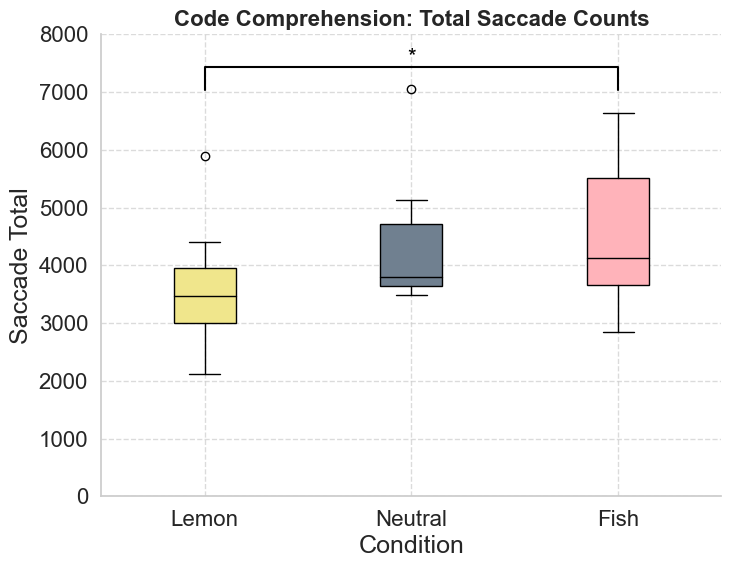

In [16]:
import matplotlib.pyplot as plt

# Data provided by the user
data = ccd_saccades
# data = task_duration_data
# data = prose_saccades

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Code Comprehension: Total Saccade Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Saccade Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

# Adding the significance annotation
x1, x2 = 1, 3  # positions for Lemon and Fish
y, h, col = max(max(data['lemon']), max(data['fish'])) + 400, 400, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"*", ha='center', va='bottom', fontsize=16, color=col)

ax = plt.gca()
ax.set_ylim([0, 8000])

# Remove top and right spines for a cleaner look
sns.despine()
# plt.savefig("figures/saccade_box_plot.png", dpi=150)
# Show the plot
plt.show()